# **Absenteeism in Toms River High School East**
![banner.jpg](https://www.trschools.com/hseast/imgs/banner.jpg)

***

## Introduction
Toms River High School East (TRSHE), a comprehensive four-year high school located in New Jersey, is affected by large absent rates. In fact, the chronic absenteeism rates in TRSHE has been above the NJ state average rates from grades 9th to 12th. This kernel's objective is to better understand the underlying patterns of TRSHE absenteeism, how certain factors contribute to these patterns, and the type of methods that are best for prediction.

T-Test to check for significance.
Data binning

Check 3D for Tardies and Absent relationships

Outline:
1. [Data Overview](#section-one)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import Image
import os

student_data = pd.read_csv('../input/dataproj/High School East Student Data - Sheet1.csv')

<a id="section-one"></a>
# 1. Data Overview

The data was collected through the help of Mrs. Anders and Dr. Kretz, both faculty of TRSHE. Certain variables were chosen because chronic absenteeism is susceptible to variables like **Limited English Proficiency, 504/IDEA Disability, Race/Ethnicity**, and likewise. A comprehensive and large dataset of students in the United States conducted by the National Center for Education Statistics exists, but many important variables were surpressed for public-use. Accessing that data is a **rigorous** and **security-tight** process involving various academic officers that no regular person could pass. So that wasn't happening. So I resorted to my school data.

Thus, the data collected for this project was **manually** recorded. 
***

**A6-A12**: represents absences from 6th grade to 12th grade

**T6-T12**: represents tardies from 6th grade to 12th grade

**IEP/Specialized**: represents whether a student is in special education

In [2]:
student_data.head()

,Student,English Langauge Learner,Has a Disability?,Student on Free or Reduced Lunch,Race/Ethnic,A6,A7,A8,A9,A10,...,A12,T6,T7,T8,T9,T10,T11,T12,Gender,IEP/Specialized
0,CA,Yes/No?,No,No,Asian,1,0,0,0,1,...,0.0,9,4,5,1,2,2,1,M,No
1,CI,No,No,NaN,White,5,9,5,6,9,...,3.0,2,2,3,4,2,4,1,F,No
2,CIS,NaN,No,NaN,White/Hispanic,0,0,0,0,0,...,2.0,0,0,0,0,0,5,2,F,No
3,DIP,NaN,No,NaN,White,2,7,8,7,10,...,13.0,1,0,3,6,7,9,3,F,No
4,EA,NaN,No,NaN,White,7,10,7,4,1,...,1.0,1,0,0,0,5,0,0,F,No


In [3]:
print(student_data.iloc[0].values[5:12]) # absence columns
print(student_data.iloc[0].values[12:19]) #tardy columns

['1' '0' '0' '0' '1' 2.0 0.0]
['9' '4' '5' '1' 2 2 1]


Because some absent and tardy count columns contains a string ("TRANSFER"), some of the variables in the **A6** to **A12** and **T6** to **T12** columns are represented as strings instead of integers. So I made some adjustments and converted the necessary values to int values. 

https://stackoverflow.com/questions/59084770/one-hot-encoder-what-is-the-industry-norm-to-encode-before-train-split-or-after

## 1.1 Preparing Data for Graph

I make a separate instance of student_data because I will be preproccessing data before the train test split in order for searborn and matplotlib to work. Here, I convert number values that are strings into an int type even if the string indicates a float type (some students have absences like 2.5 for a given year). Then, I convert "TRANSFER" to equal 0.

In [4]:
dataForGraph = pd.read_csv('../input/dataproj/High School East Student Data - Sheet1.csv')

#easy way of accessing A_6, A_7, ... A_N columns
def column_list(letter, start, end):
    return ["%s%d" % (letter, i) for i in range(start, end)]

#convert strings to int type even if it's a float
def convertStat(x):
    
    if(isinstance(x, int) == False):
        
        #we don't know if the string is float or int
        #converting it to int if it's not an int will cause an error
        try:
            return 0 if x == "TRANSFER" else int(x)
        except:
            pass
        
        #if it can't pass as an int, then it must be a float that will be converted to an int
        #the float is rounded
        return 0 if x == "TRANSFER" else int(float(x))
    else:
        return x

#convert absent and tardy columsn to integers
for i in ["A", "T"]:
    for j in column_list(i, 6, 13):
        dataForGraph[j] = dataForGraph[j].apply(convertStat)

print(list(dataForGraph.iloc[0].values[5:12])) # absence columns of first student
print(list(dataForGraph.iloc[0].values[12:19])) #tardy columns


[1, 0, 0, 0, 1, 2, 0]
[9, 4, 5, 1, 2, 2, 1]


In [5]:

dataForGraph['AbsentSum'] = dataForGraph[column_list('A', 6, 13)].sum(axis=1)
dataForGraph['TardySum'] = dataForGraph[column_list('T', 6, 13)].sum(axis=1)


#for different time periods
dataForGraph['AbsencesSum_MS'] = dataForGraph[column_list('A', 6, 9)].sum(axis=1)
dataForGraph['AbsencesSum_HS'] = dataForGraph[column_list('A', 9, 13)].sum(axis=1)

dataForGraph['TardiesSum_MS'] = dataForGraph[column_list('T', 6, 9)].sum(axis=1)
dataForGraph['TardiesSum_HS'] = dataForGraph[column_list('T', 9, 13)].sum(axis=1)


## 1.2 Graphing the Data

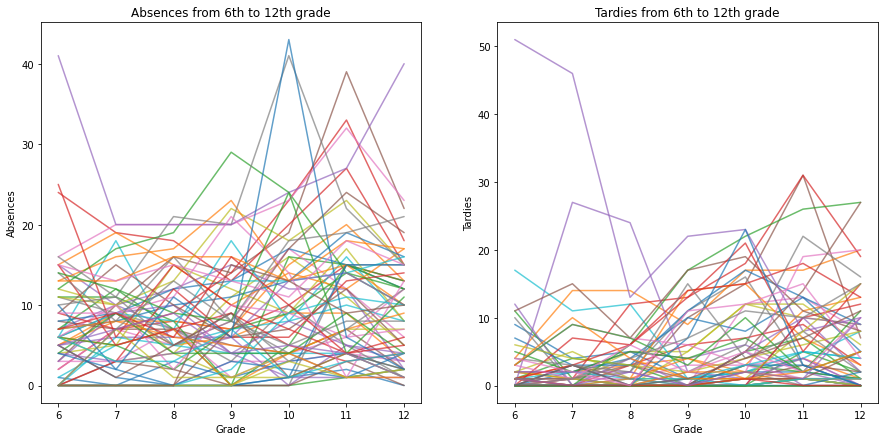

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#plt.figure(figsize=(2,10))

sns.set_style("ticks")

# 6:13 represents the absent columns
# 13:20 represents the tardy columns
x_values = range(6,13)
for i in range(len(student_data)):
    absences_y = dataForGraph.iloc[i].values[5:12]
    tardies_y = dataForGraph.iloc[i].values[12:19]

    ax1.plot(x_values, np.array(absences_y), alpha=0.7)    
    ax2.plot(x_values, np.array(tardies_y), alpha=0.7)

ax1.set_title("Absences from 6th to 12th grade")
ax2.set_title("Tardies from 6th to 12th grade")

ax1.set_ylabel("Absences")
ax2.set_ylabel("Tardies")

ax2.set_xlabel("Grade")
ax1.set_xlabel("Grade")

plt.subplots_adjust(wspace=0.2)

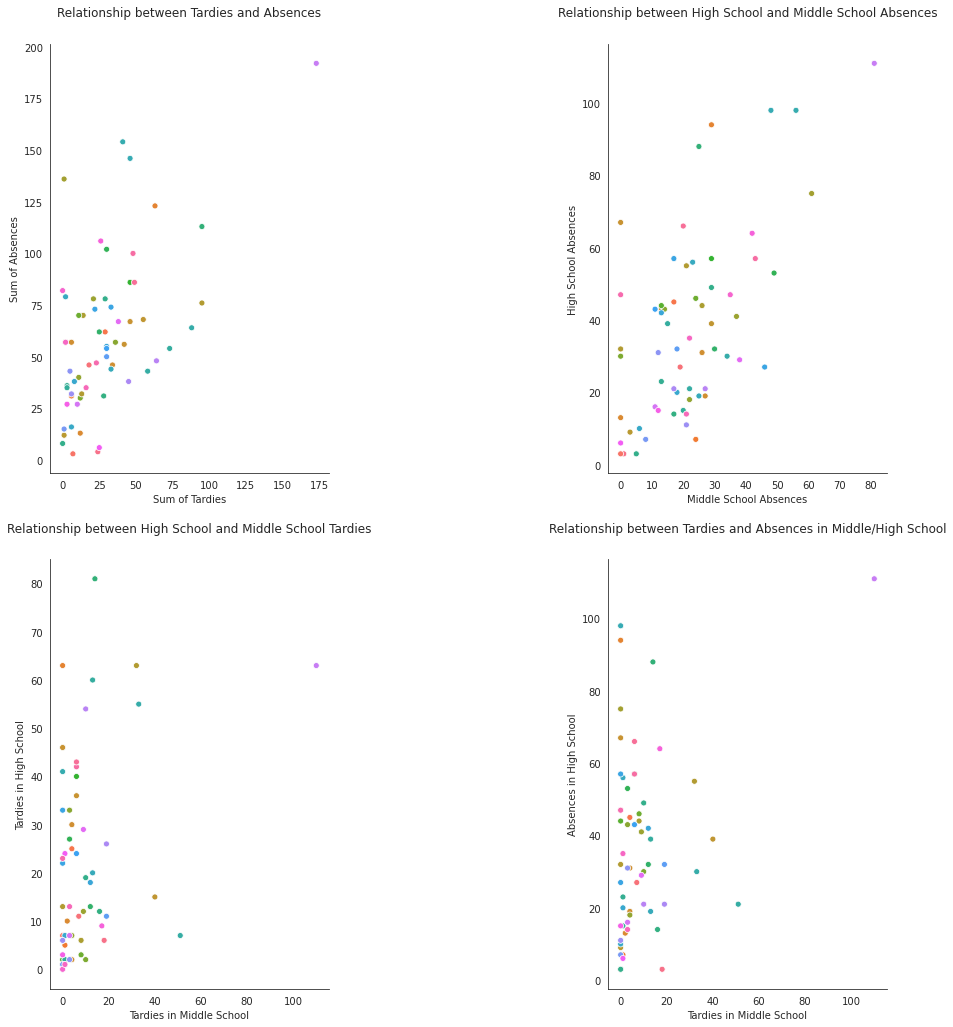

In [7]:

# middle school tardies vs middle school absences

def create_graph(ax, x, y, xlabel, ylabel, title):
    ax.title.set_position([.5, 1.05])
    sns.scatterplot(x=x, y=y, hue="Student", data=dataForGraph, legend=False, ax=ax)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    
with sns.axes_style("white"):
    fg, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(15,7))
    sns.despine(fig=fg)
    create_graph(ax1, "TardySum", "AbsentSum", "Sum of Tardies", "Sum of Absences", "Relationship between Tardies and Absences")

    create_graph(ax2, "AbsencesSum_MS", 
                 "AbsencesSum_HS", 
                 "Middle School Absences", 
                 "High School Absences", 
                 "Relationship between High School and Middle School Absences")

    create_graph(ax3, "TardiesSum_MS", 
                 "TardiesSum_HS", 
                 "Tardies in Middle School", 
                 "Tardies in High School", 
                 "Relationship between High School and Middle School Tardies")

    create_graph(ax4, "TardiesSum_MS", 
                 "AbsencesSum_HS", 
                 "Tardies in Middle School", 
                 "Absences in High School", 
                 "Relationship between Tardies and Absences in Middle/High School")


plt.subplots_adjust(wspace=1, top=2)

In the above scatterplots, tardies in middle school or in general do not seem to have a strong linear relationship with the number of absences. 

<Figure size 432x288 with 0 Axes>

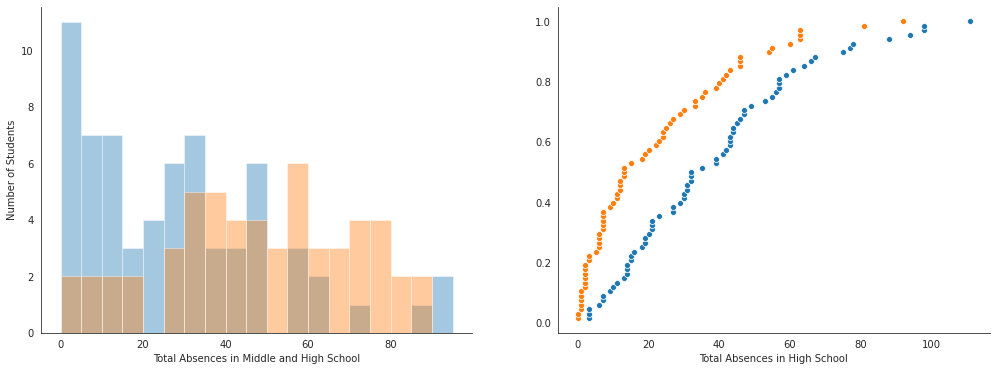

In [27]:
plt.clf()

#sns.distplot(student_data["AbsencesSum_HS"], bins=5, kde=False)
Histbins = range(0,100,10)

#plt.hist(student_data["AbsencesSum_HS"], bins=Histbins, edgecolor="black")

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

students = dataForGraph["AbsencesSum_HS"]

x_, y_ = ecdf(students)

students = dataForGraph["TardiesSum_HS"]
h, g = ecdf(students)

print()

with sns.axes_style("white"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,6))
    sns.despine(fig=fig)
    
    sns.distplot(dataForGraph["AbsencesSum_HS"], bins=Histbins, kde=False, rug=False, ax=ax1)
    ax1.set_xlabel("Total Absences in Middle and High School")
    ax1.set_ylabel("Number of Students")
    
    #sns.boxplot(x="AbsencesSum_HS", data=dataForGraph, ax=ax2)
    #sns.swarmplot(y="AbsencesSum_HS", data=dataForGraph)
    sns.scatterplot(x=x_, y=y_)
    sns.scatterplot(x=h, y=g)
    
    ax2.set_xlabel("Total Absences in High School")




[Based on TRSHE data,](https://rc.doe.state.nj.us/report.aspx?type=school&lang=english&county=29&district=5190&school=030&schoolyear=2018-2019#P99cba7ec593f446e8cbf8d62c3db0208_2_oHit0) the chronic absent rates grow throughout the grade levels. At grade 12, **21**% of students, 2% higher than the NJ state average, have been chronically absent. In grade 11, **20**% of TRSHE students were chronically absent, which is 6% higher than the NJ state average.

For our dataset, **what is the distrubtion of tardies/absences over the grades, and what are some variable relationships?**

<Figure size 432x288 with 0 Axes>

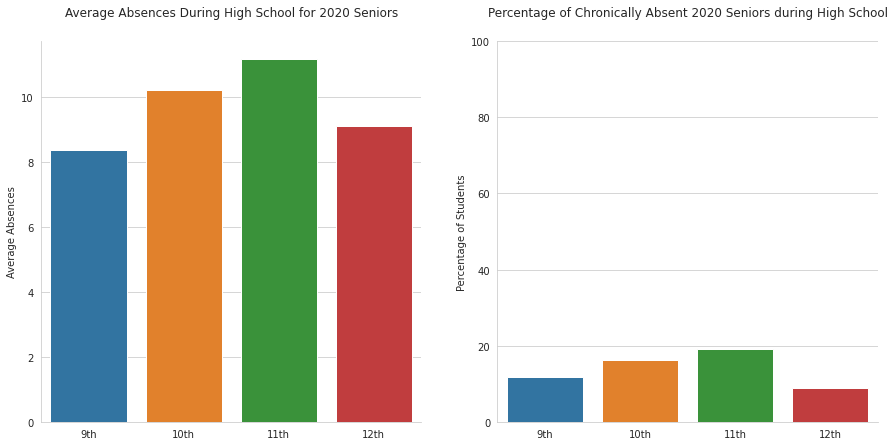

In [9]:
plt.clf()

numOfStudents, cols = dataForGraph.shape

absentColumns = column_list("A", 9, 13)
barplot_absences = dataForGraph[absentColumns]

percentageOfChronic = \
    100 * np.array([len(barplot_absences[barplot_absences[i] >= 18]) for i in absentColumns]) / numOfStudents

with sns.axes_style("whitegrid"):    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    sns.despine(fig=fig)
    sns.barplot(data=barplot_absences, ax=ax1, ci=None)
    ax1.title.set_position([.5, 1.05])
    ax1.set_xticklabels(["9th", "10th", "11th", "12th"])
    ax1.set_title("Average Absences During High School for 2020 Seniors")
    ax1.set_ylabel("Average Absences")

    plt.ylim([0,100])
    sns.barplot(x=list(range(0, len(percentageOfChronic))), y=percentageOfChronic.tolist(), ax=ax2)
    ax2.title.set_position([.5, 1.05])
    ax2.set_xticklabels(["9th", "10th", "11th", "12th"])
    ax2.set_title("Percentage of Chronically Absent 2020 Seniors during High School")
    ax2.set_ylabel("Percentage of Students")
    
#perhaps look for 2020 student data and compare the two findings???
    

Percentage of Chronic Absentees by HS Grade in Sample
('Absences in 9', 11.764705882352942)
('Absences in 10', 16.176470588235293)
('Absences in 11', 19.11764705882353)
('Absences in 12', 8.823529411764707)


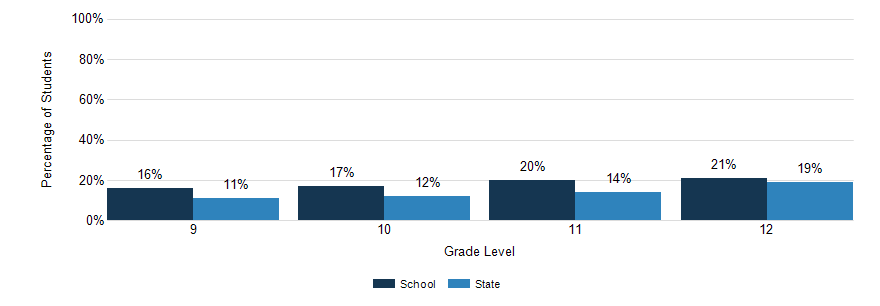

In [10]:
print("Percentage of Chronic Absentees by HS Grade in Sample")
for i in list(zip(column_list("Absences in ", 9, 13), percentageOfChronic.tolist())):
    print(i)
    
Image('../input/testimage/Reserved.ReportViewerWebControl-1.png')

Absences are lower in the 12th grade because of **COVID-19**: absences were not counted in the standard fashion (missing a class or even the first class of the day would not count towards absences). What's good about these statistics is that the chronic absent rate across grade levels in high school closely mimics the NJ School Performance Report for 2018-2019, an official report that considers all students. That means that the dataset wasn't aquired in a manner that wouldn't fit real life (e.g. skewed). Therefore, it would be a good representation of real life despite the dataset being much smaller.


# 2. Setting Up Learning Models

Next, I will split the actual student_data dataframe and use prior proprocessing methods created in the creation of the graphs above. I will do minor proprocessing before the cross validations of each model.

In [11]:
random_seed = 1
test_size = 0.2

features = ["A6", "A7", "A8", "A9", "Gender", "IEP/Specialized"]
y_objective = student_data["AbsencesSum_HS"]

for i in ["A", "T"]:
    for j in column_list(i, 6, 13):
        student_data[j] = student_data[j].apply(convertStat)


student_data['AbsencesSum_HS'] = student_data[column_list('A', 9, 13)].sum(axis=1)

student_data["Gender"] = pd.get_dummies(student_data["Gender"])
student_data["IEP/Specialized"] = pd.get_dummies(student_data["IEP/Specialized"])

KeyError: 'AbsencesSum_HS'

After manipulating the dataset so that it can be processed by the learning models, I create methods to automate the process of comparing learning models.

https://machinelearningmastery.com/train-final-machine-learning-model/

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    
    return mae


def runModels(models, trainX, trainY, cv):
    cross_valid = []
    for i in models:
        model = i[1]
        model.fit(trainX, trainY)
        scores = -1 * cross_val_score(model, 
            trainX,
            trainY,
            cv=cv,
            scoring="neg_mean_absolute_error")

        cross_valid.append((i[0], scores.mean(), scores))

    return cross_valid

models = []


models.append(('XGBRegressor', 
    XGBRegressor(random_state=random_seed,
        n_estimators=2000,
        learning_rate=0.0006)))

models.append(('DecisionTreeRegressor', 
    DecisionTreeRegressor(random_state=random_seed)))

modelOutcomes = runModels(models, 
    student_data[features], 
    student_data["AbsencesSum_HS"], 
    5)

for i in modelOutcomes:
    print(i)

In [ ]:
from sklearn.model_selection import train_test_split


"""
#split and preproccess
train_X, val_X, train_y, val_y = train_test_split(student_data[features], y_objective, random_state=random_seed, test_size=test_size)

train_X = pd.get_dummies(train_X)
val_X = pd.get_dummies(val_X)

# get_dummies creates different columns,but each set needs to have equal # of features
missing_cols = set( train_X.columns ) - set( val_X.columns )
for c in missing_cols:
    val_X[c] = 0

val_X = val_X[train_X.columns]

#right now its a little weird, each possible value is its own column but the data works surprisingly well????
print(train_X)

print("Now the training and testing sets have equal number of columns after encoding their categorical values")
print(val_X.shape)
print(train_X.shape)

"""

# 3. Learning Models

## 3.1 Decision Trees/Random Forests

Objective is to find the optimal number of leaves for each decision tree. The next step is to compare each model to each other for the most optimal model to use.

In [ ]:
"""

models.append(('LogisticRegression', 
    LogisticRegression(random_state=random_seed, max_iter=10000)))


models.append(('DecisionTreeRegressor', 
    DecisionTreeRegressor(random_state=random_seed)))

models.append(('XGBRegressor', 
    XGBRegressor(random_state=random_seed,
        n_estimators=2000,
        learning_rate=0.0006)))

models.append(('SVC',
    SVC(random_state=random_seed)))

models.append(("KNeighborsRegressor",
    KNeighborsRegressor()))

"""


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


#==================== Validate the Decision Tree Model ===========================
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    
    return mae

leaf_node_range = range(2,30)
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in leaf_node_range}
low = min(scores, key=scores.get)
student_tree_model = DecisionTreeRegressor(random_state=1, max_leaf_nodes=min(scores, key=scores.get))
student_tree_model.fit(train_X, train_y)

absences_predictions = student_tree_model.predict(val_X)
mae = mean_absolute_error(absences_predictions, val_y)

print("Validation MAE: {:,.0f}".format(mae))

https://towardsdatascience.com/why-random-forests-outperform-decision-trees-1b0f175a0b5
https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

random_forest = RandomForestRegressor(random_state=random_seed,
                                    max_features="log2",
                                    n_estimators=400,
                                    max_leaf_nodes=low,
                                    min_samples_split=12,
                                    min_samples_leaf=40)

mae = []
random_forest.fit(train_X, train_y)
absences_predictions = random_forest.predict(val_X)
print(mean_absolute_error(absences_predictions, val_y))

scores = -1 * cross_val_score(student_tree_model, train_X, train_y,
                              cv=5,
                            scoring='neg_mean_absolute_error')

print(scores.mean())
print(list(scores))



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

models = []
models.append(('LogisticRegression', LogisticRegression()))

def runModels(models, trainX, trainY, valY, cv):
    cross_valid = []
    for i in models:
        model = i[1]
        scores = -1 * cross_val_score(model, 
            trainX, 
            trainY,
            cv=cv,
            scoring="mean_absolute_error")

        cross_valid.append((i[0], scores.mean(), scores))

    return cross_valid

logReg = LogisticRegression(random_state=1, max_iter=10000)
logReg.fit(train_X, train_y)
absences_predictions = logReg.predict(val_X)
print(mean_absolute_error(absences_predictions, val_y))
